## Naive/Persistence  Forecast Model
Naive Forecast Model - In Naive forecast model, we assume that last period value is forecast for this period.

In [1]:
import pandas as pd
df = pd.read_csv('daily-min-temperatures.csv',header = 0,parse_dates = [0])

In [3]:
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [2]:
df['t'] = df['Temp'].shift(1)

In [5]:
df.head()

,Date,Temp,t
0,1981-01-01,20.7,NaN
1,1981-01-02,17.9,20.7
2,1981-01-03,18.8,17.9
3,1981-01-04,14.6,18.8
4,1981-01-05,15.8,14.6


In [7]:
df.shape[0]-7

3643

We are taking last 7 values as test values.

In [3]:
train, test = df[1 : df.shape[0]-7],df[df.shape[0]-7:]

In [9]:
train.head()

,Date,Temp,t
1,1981-01-02,17.9,20.7
2,1981-01-03,18.8,17.9
3,1981-01-04,14.6,18.8
4,1981-01-05,15.8,14.6
5,1981-01-06,15.8,15.8


In [4]:
X_train,Y_train  = train['t'],train['Temp']
X_test, Y_test = test['t'],test['Temp']

In [ ]:
## Walk Forward Validation

In [11]:
predictions = X_test.copy()

In [12]:
print(predictions)
print(Y_test)

3643    10.0
3644    12.9
3645    14.6
3646    14.0
3647    13.6
3648    13.5
3649    15.7
Name: t, dtype: float64
3643    12.9
3644    14.6
3645    14.0
3646    13.6
3647    13.5
3648    15.7
3649    13.0
Name: Temp, dtype: float64


In [13]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test,predictions)
mse

3.4228571428571413

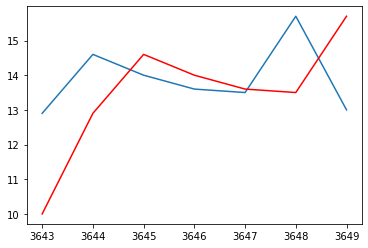

In [19]:
import matplotlib.pyplot as plt
plt.plot(Y_test)
plt.plot(predictions, color = 'red')

# Auto Regression Model

Auto Regression Model, equation Y' = Bo +B1X1, 
First we feed X and Y valye and try to find Bo and B1, then using Bo and B1, predict futeure values for new input.

In Auto Regression model - lag values of same variables are used
as input values.

In [18]:
df.drop('t',axis =1, inplace = True )

In [20]:
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [7]:
train,test = df.Temp[1:df.shape[0]-7],df.Temp[df.shape[0]-7:]

In [22]:
train.head()

1    17.9
2    18.8
3    14.6
4    15.8
5    15.8
Name: Temp, dtype: float64

In [24]:
from statsmodels.tsa.ar_model import AR

In [25]:
model = AR(train)
model_fit = model.fit()

C:\Users\swati\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


In [26]:
model_fit.k_ar

29

Coef of lag variables

In [27]:
model_fit.params

const       0.557544
L1.Temp     0.588595
L2.Temp    -0.090826
L3.Temp     0.048262
L4.Temp     0.040065
L5.Temp     0.039302
L6.Temp     0.025946
L7.Temp     0.044668
L8.Temp     0.012768
L9.Temp     0.037436
L10.Temp   -0.000812
L11.Temp    0.004791
L12.Temp    0.018473
L13.Temp    0.026891
L14.Temp    0.000576
L15.Temp    0.024810
L16.Temp    0.007403
L17.Temp    0.009916
L18.Temp    0.034160
L19.Temp   -0.009120
L20.Temp    0.024213
L21.Temp    0.018787
L22.Temp    0.012184
L23.Temp   -0.018553
L24.Temp   -0.001772
L25.Temp    0.016732
L26.Temp    0.019762
L27.Temp    0.009832
L28.Temp    0.006227
L29.Temp   -0.001377
dtype: float64

In [30]:
len(test)

7

In [32]:
len(train)+len(test)-1

3648

In [33]:
predictions = model_fit.predict(start=len(train),end = len(train)+len(test)-1)

In [34]:
predictions

3643    11.871275
3644    13.053794
3645    13.532591
3646    13.243126
3647    13.091438
3648    13.146989
3649    13.176153
dtype: float64

In [35]:
predictions.iloc[0]

11.871274847727824

In [41]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test,predictions)
mse

1.5015252310070146

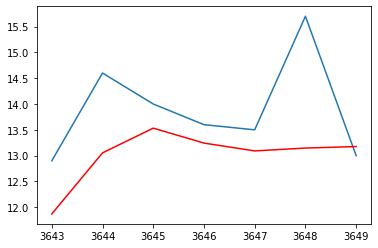

In [38]:
plt.plot(Y_test)
plt.plot(predictions,color = 'red')

# Walk Forward

In Walk Forward method, we take previous time point values  as input and predict for future value. Means at time t, we take  at time t-1 data as input and predict for point t ,then  for  point t+1, we take both t-1 and t data points as input and predict for t+1 and so on.

In [9]:
from statsmodels.tsa.ar_model import AR
import numpy as np
data = train
predict = []
for t in test:
    model = AR(data)
    model_fit = model.fit()
    y = model_fit.predict(start = len(data), end = len(train)+len(test)-1)
    print(y.values[0])
    predict.append(y.values[0])
    data = np.append(data,t)
    data = pd.Series(data)

11.871274847727824
13.6606999438352
14.353164144090146
13.430120791627004
13.374756477185123
13.479111299420504
14.767773018439868


In [10]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test.values, predict)
mse

1.4524568425185334

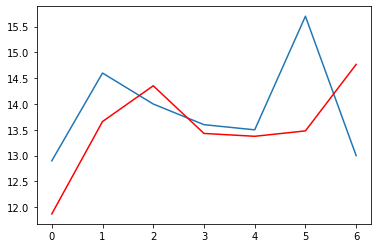

In [11]:
import matplotlib.pyplot as plt
plt.plot(test.values)
plt.plot(predict, color = 'red')

# Moving Average Model

In Moving Average Model:
Build a forecasting model (AR or Persistence model)
find residual/forecast errors.
Build a forecast model on residulas.
Use forecasted residuals to update the initial forecast
If Initial forecast model is AR model then ,this technique is 
called ARMA.

In [2]:
df['t'] = df['Temp'].shift(1)

In [3]:
df.head()

,Date,Temp,t
0,1981-01-01,20.7,NaN
1,1981-01-02,17.9,20.7
2,1981-01-03,18.8,17.9
3,1981-01-04,14.6,18.8
4,1981-01-05,15.8,14.6


# Creating Residual Value

Temp is the  actual value which we want to predict and t is predicted value.

In [5]:
df['resid'] = df['Temp'] - df['t']

In [5]:
df.head()

,Date,Temp,t,resid
0,1981-01-01,20.7,NaN,NaN
1,1981-01-02,17.9,20.7,-2.8
2,1981-01-03,18.8,17.9,0.9
3,1981-01-04,14.6,18.8,-4.2
4,1981-01-05,15.8,14.6,1.2


In [6]:
train,test = df.resid[1:df.shape[0]-7],df.resid[df.shape[0]-7:]

In [7]:
train.head()

1   -2.8
2    0.9
3   -4.2
4    1.2
5    0.0
Name: resid, dtype: float64

In [7]:
x_train,y_train = df.resid[1:df.shape[0]-7],df.Temp[1:df.shape[0]-7]
x_test,y_test = df.resid[df.shape[0]-7:],df.Temp[df.shape[0]-7:]

In [8]:
y_test

3643    12.9
3644    14.6
3645    14.0
3646    13.6
3647    13.5
3648    15.7
3649    13.0
Name: Temp, dtype: float64

In [9]:
from statsmodels.tsa.ar_model import AR
import warnings
warnings.filterwarnings('ignore')
model = AR(train)
model_fit = model.fit()

In [10]:
model_fit.k_ar

29

In [11]:
model_fit.params

const       -0.006415
L1.resid    -0.407139
L2.resid    -0.496194
L3.resid    -0.445747
L4.resid    -0.403706
L5.resid    -0.362528
L6.resid    -0.334810
L7.resid    -0.288468
L8.resid    -0.274281
L9.resid    -0.235333
L10.resid   -0.234799
L11.resid   -0.228532
L12.resid   -0.208608
L13.resid   -0.180324
L14.resid   -0.178425
L15.resid   -0.152265
L16.resid   -0.143617
L17.resid   -0.132501
L18.resid   -0.097075
L19.resid   -0.104927
L20.resid   -0.079371
L21.resid   -0.059348
L22.resid   -0.045921
L23.resid   -0.063197
L24.resid   -0.063441
L25.resid   -0.045061
L26.resid   -0.023578
L27.resid   -0.011882
L28.resid   -0.003789
L29.resid   -0.003422
dtype: float64

In [ ]:
Above are laged values on residuals.

In [12]:
pred_resid = model_fit.predict(start = len(train),end = len(train)+len(test)-1)

In [13]:
pred_resid

3643    2.004986
3644    1.264192
3645    0.510869
3646   -0.251687
3647   -0.122054
3648    0.077509
3649    0.055600
dtype: float64

In [14]:
predictions = df.t[df.shape[0]-7:]+pred_resid
predictions

3643    12.004986
3644    14.164192
3645    15.110869
3646    13.748313
3647    13.477946
3648    13.577509
3649    15.755600
dtype: float64

In [15]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,predictions)
mse

2.0493985566482085

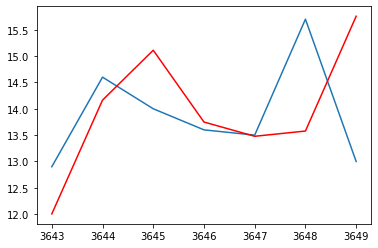

In [16]:
import matplotlib.pyplot as plt
plt.plot(y_test)
plt.plot(predictions, color = 'red')